In [1]:
import pandas
from pandas import DataFrame
from matplotlib import pyplot as plt


,agent,winner,turns,run_time,depth
0,PieceSquares,draw,489,0.373497,1
1,PieceSquares,draw,566,0.315382,1
2,PieceSquares,Random,312,0.184364,1
3,PieceSquares,draw,652,0.291193,1
4,PieceSquares,draw,322,0.193055,1


,turns,run_time,depth
count,200.000000,200.000000,200.000000
mean,342.040000,4.123867,1.500000
std,167.182711,4.559123,0.501255
min,33.000000,0.028553,1.000000
25%,212.000000,0.190786,1.000000
50%,328.000000,0.976861,1.500000
75%,475.000000,7.783344,2.000000
max,816.000000,16.627921,2.000000


Text(0, 0.5, 'Count')

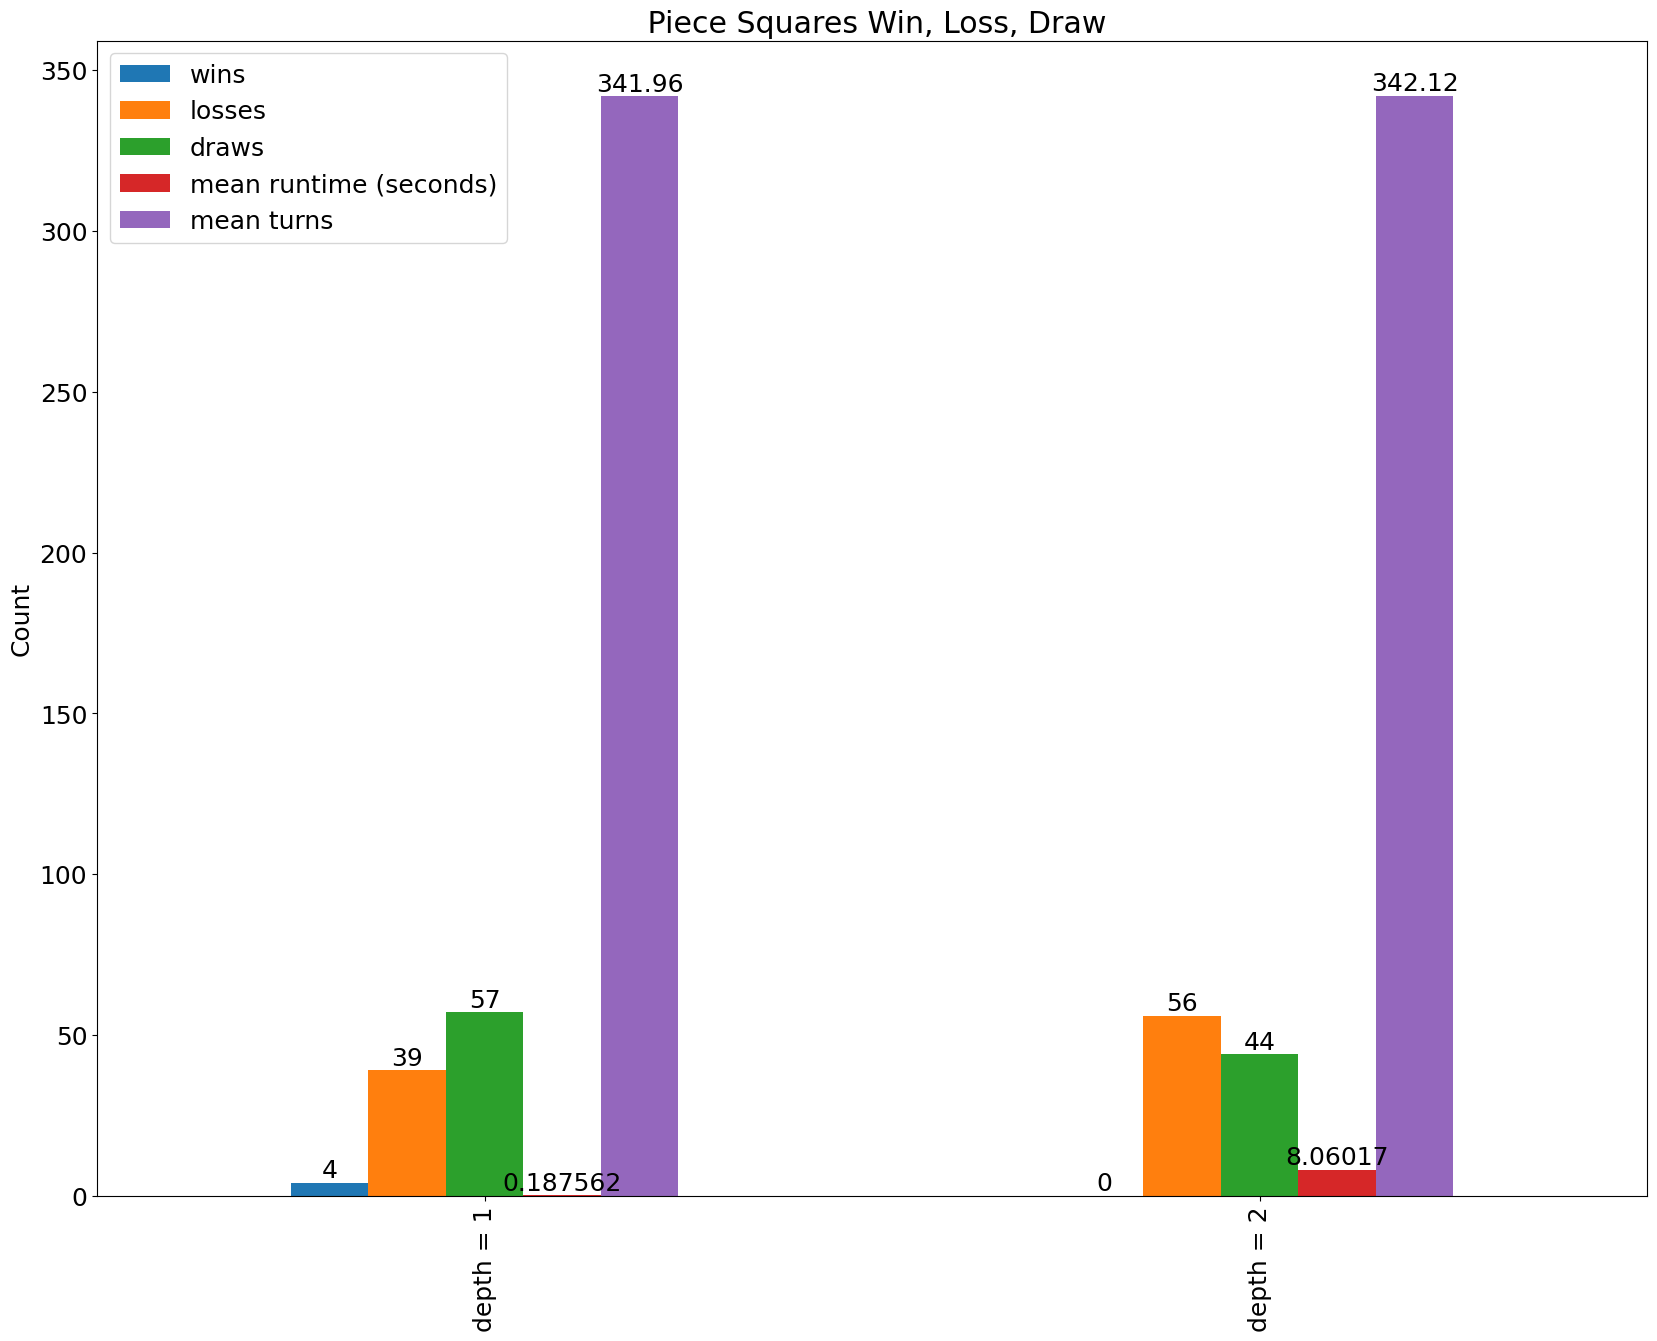

In [2]:
ps_df_1: DataFrame = pandas.read_csv('./data/PieceSquares_100_1.csv')
ps_df_2: DataFrame = pandas.read_csv('./data/PieceSquares_100_2.csv')



dfs = [ps_df_1, ps_df_2]

ps_df =  pandas.concat(dfs)
display(ps_df.head(5))
display(ps_df.describe())

wins = []
draws = []
losses = []
runtime = []
turns = []
for df in dfs:
    if 'PieceSquares' in df.groupby('winner').size():
        wins.append(df.groupby('winner').size()['PieceSquares'])
    else:
        wins.append(0)
    draws.append(df.groupby('winner').size()['draw'])
    losses.append(df.groupby('winner').size()['Random'])
    runtime.append(df['run_time'].mean())
    turns.append(df['turns'].mean())


plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams.update({'font.size': 18})


plotdata = pandas.DataFrame({
    "wins":wins,
    "losses":losses,
    "draws":draws,
    "mean runtime (seconds)":runtime,
    "mean turns":turns
    }, 
    index=['depth = 1', 'depth = 2']
)

ax = plotdata.plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container)
plt.title(" Piece Squares Win, Loss, Draw")
plt.ylabel("Count")

,agent,winner,turns,run_time,depth,path_count,win_weight,draw_weight,lose_weight
0,MonteCarlo,draw,535,0.536043,3,5,1,-1,-2
1,MonteCarlo,draw,362,0.359741,3,5,1,-1,-2
2,MonteCarlo,MonteCarlo,279,0.328494,3,5,1,-1,-2
3,MonteCarlo,draw,477,0.483263,3,5,1,-1,-2
4,MonteCarlo,draw,538,0.487454,3,5,1,-1,-2


,turns,run_time,depth,path_count,win_weight,draw_weight,lose_weight
count,900.000000,900.000000,900.000000,900.000000,900.0,900.0,900.0
mean,258.501111,7.439562,20.666667,32.000000,1.0,-1.0,-2.0
std,183.234810,10.121675,17.566020,17.064948,0.0,0.0,0.0
min,5.000000,0.029832,3.000000,3.000000,1.0,-1.0,-2.0
25%,102.500000,1.720326,10.000000,30.000000,1.0,-1.0,-2.0
50%,187.000000,3.818870,10.000000,30.000000,1.0,-1.0,-2.0
75%,432.500000,9.320856,30.000000,50.000000,1.0,-1.0,-2.0
max,762.000000,74.633311,50.000000,50.000000,1.0,-1.0,-2.0


Text(0, 0.5, 'Count')

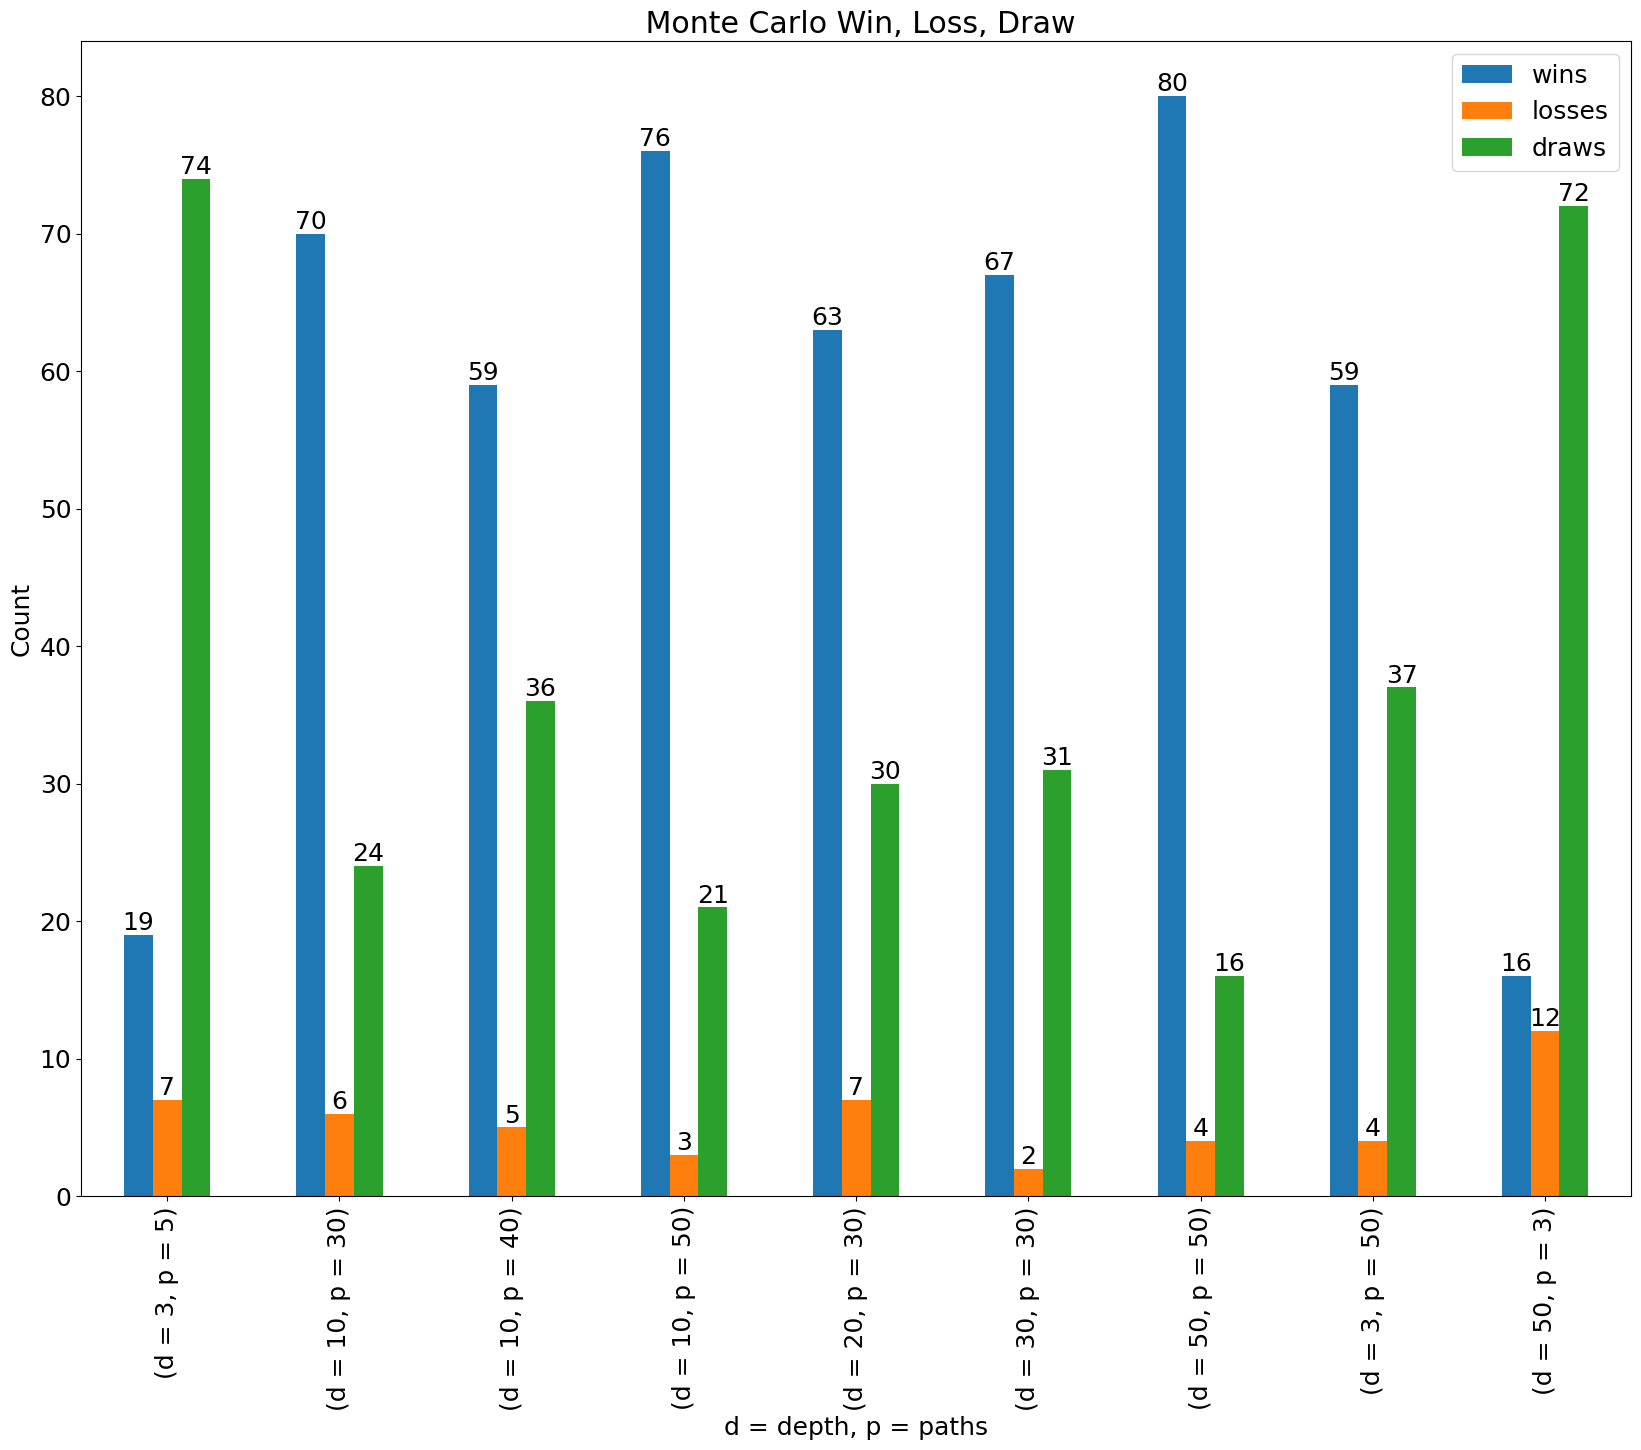

In [3]:
mc_df_1: DataFrame = pandas.read_csv('./data/MonteCarlo_100_3_5.csv')
mc_df_2: DataFrame = pandas.read_csv('./data/MonteCarlo_100_10_30.csv')
mc_df_3: DataFrame = pandas.read_csv('./data/MonteCarlo_100_10_40.csv')
mc_df_4: DataFrame = pandas.read_csv('./data/MonteCarlo_100_10_50.csv')
mc_df_5: DataFrame = pandas.read_csv('./data/MonteCarlo_100_20_30.csv')
mc_df_6: DataFrame = pandas.read_csv('./data/MonteCarlo_100_30_30.csv')
mc_df_7: DataFrame = pandas.read_csv('./data/MonteCarlo_100_50_50.csv')
mc_df_8: DataFrame = pandas.read_csv('./data/MonteCarlo_100_3_50.csv')
mc_df_9: DataFrame = pandas.read_csv('./data/MonteCarlo_100_50_3.csv')



dfs = [mc_df_1, mc_df_2, mc_df_3, mc_df_4, mc_df_5, mc_df_6, mc_df_7, mc_df_8, mc_df_9]

mc_df =  pandas.concat(dfs)
display(mc_df.head(5))
display(mc_df.describe())

wins = []
draws = []
losses = []
for df in dfs:
    wins.append(df.groupby('winner').size()['MonteCarlo'])
    draws.append(df.groupby('winner').size()['draw'])
    losses.append(df.groupby('winner').size()['Random'])

plotdata = pandas.DataFrame({
    "wins":wins,
    "losses":losses,
    "draws":draws
    }, 
    index=['(d = 3, p = 5)', '(d = 10, p = 30)', '(d = 10, p = 40)',
         '(d = 10, p = 50)', '(d = 20, p = 30)', '(d = 30, p = 30)', '(d = 50, p = 50)', '(d = 3, p = 50)', '(d = 50, p = 3)']
)

ax = plotdata.plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container)
plt.title(" Monte Carlo Win, Loss, Draw")
plt.xlabel("d = depth, p = paths")
plt.ylabel("Count")



Text(0, 0.5, 'Value')

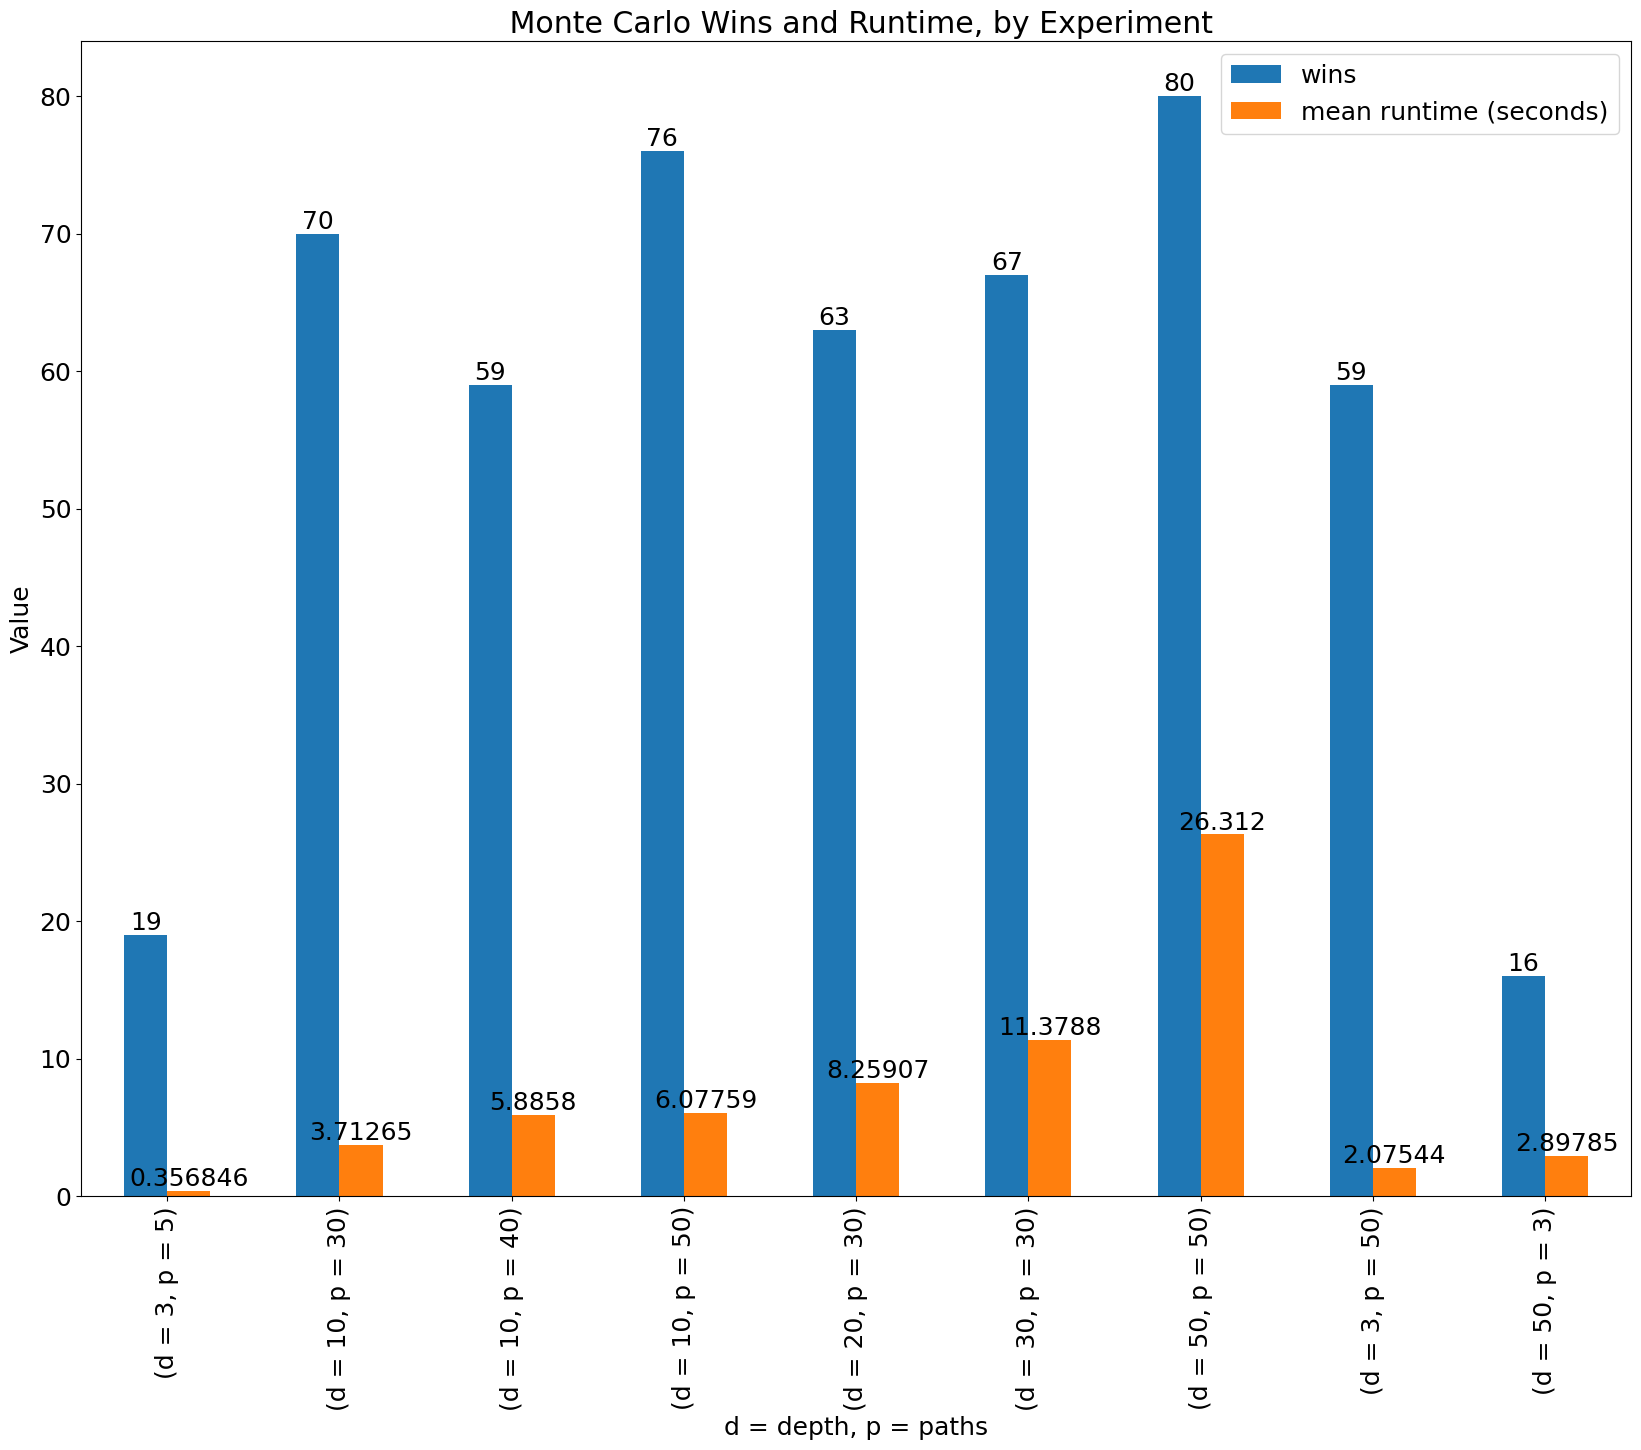

In [4]:
wins = []
runtime = []


wins = []
runtime = []
for df in dfs:
    wins.append(df.groupby('winner').size()['MonteCarlo'])
    runtime.append(df['run_time'].mean())


plotdata = pandas.DataFrame({
    "wins":wins,
    "mean runtime (seconds)":runtime
    }, 
    index=['(d = 3, p = 5)', '(d = 10, p = 30)', '(d = 10, p = 40)',
         '(d = 10, p = 50)', '(d = 20, p = 30)', '(d = 30, p = 30)', '(d = 50, p = 50)', '(d = 3, p = 50)', '(d = 50, p = 3)']
)

ax = plotdata.plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container)
plt.title(" Monte Carlo Wins and Runtime, by Experiment")
plt.xlabel("d = depth, p = paths")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

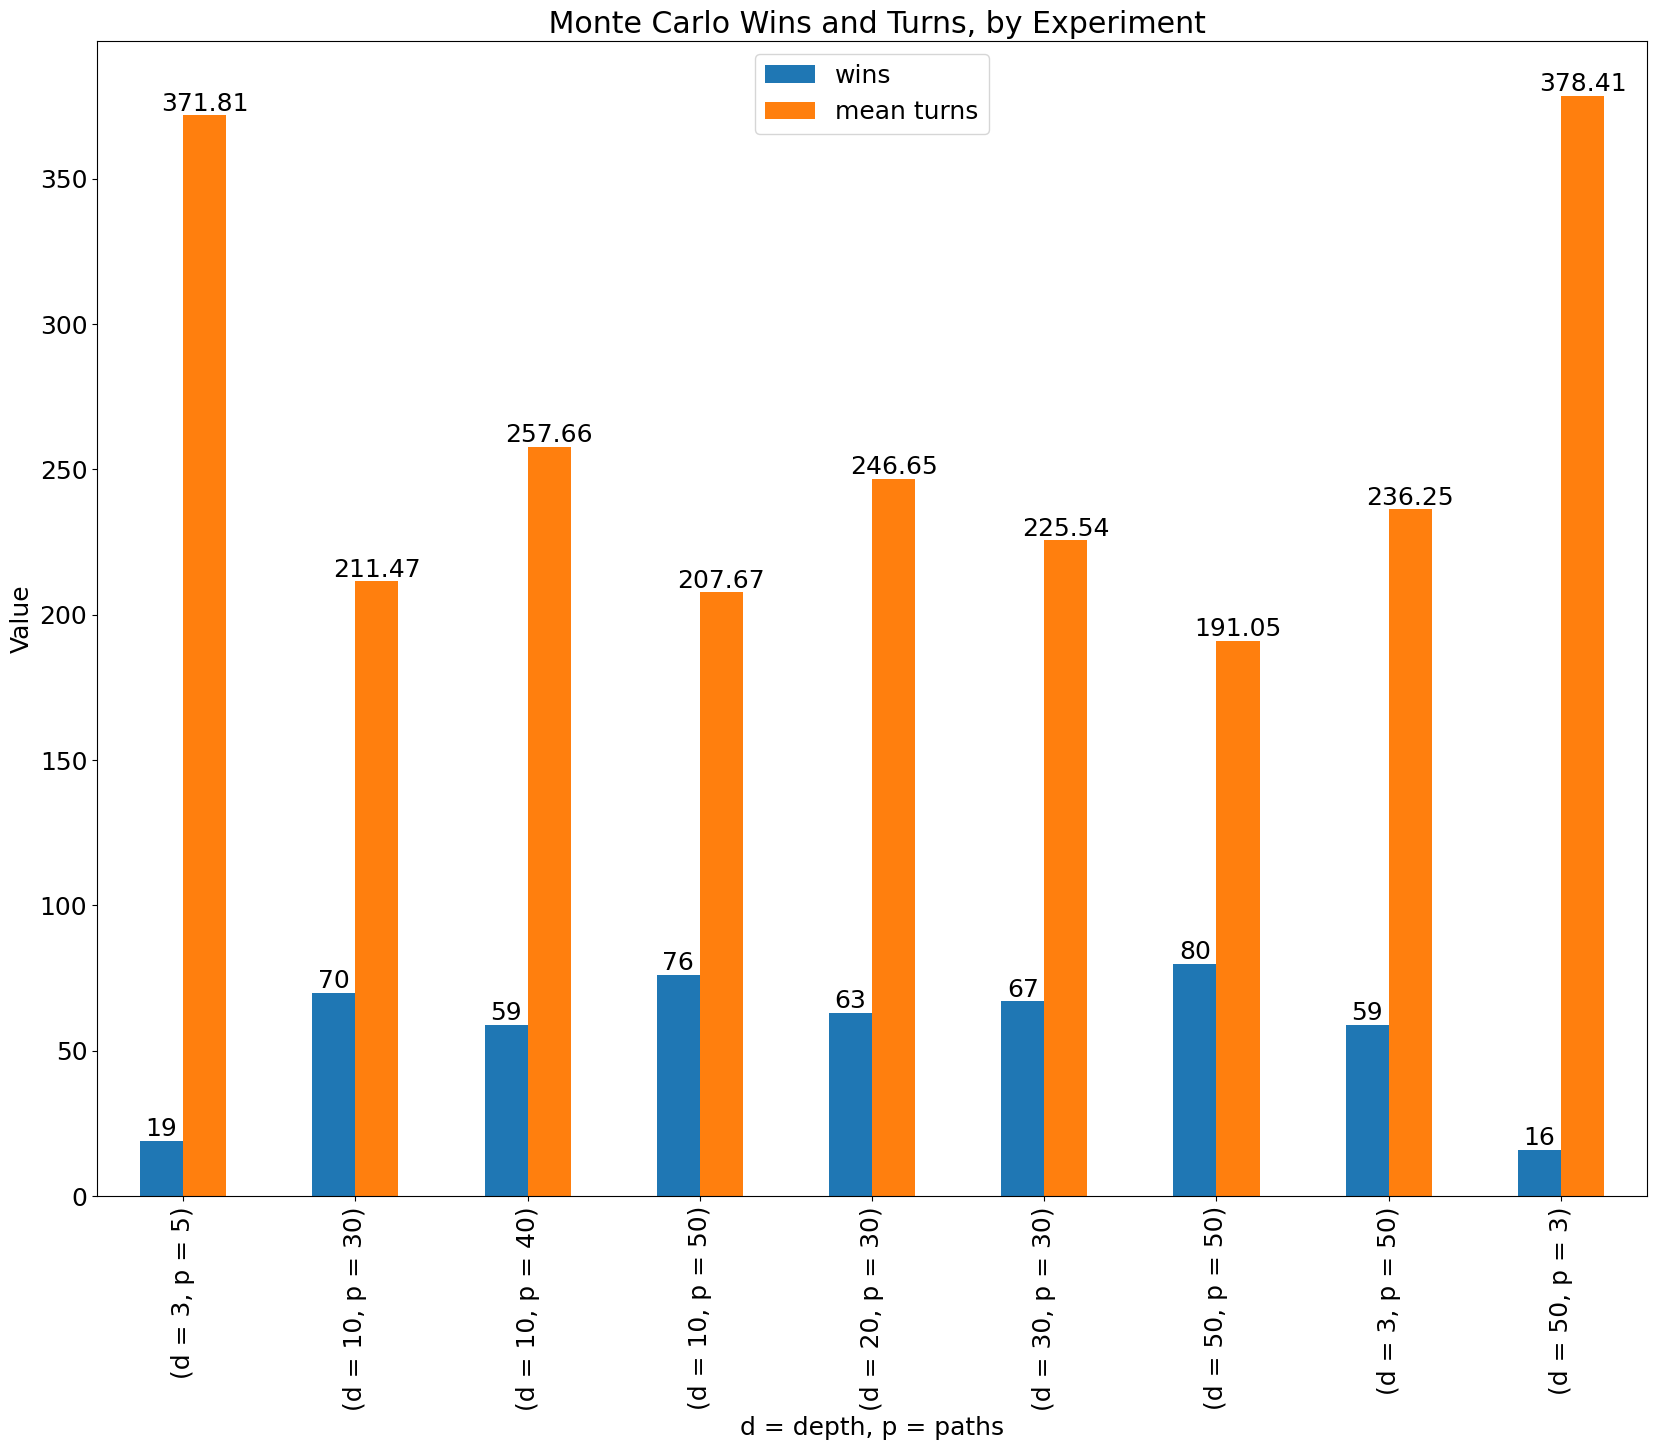

In [5]:
wins = []
runtime = []


wins = []
runtime = []
for df in dfs:
    wins.append(df.groupby('winner').size()['MonteCarlo'])
    runtime.append(df['turns'].mean())


plotdata = pandas.DataFrame({
    "wins":wins,
    "mean turns":runtime
    }, 
    index=['(d = 3, p = 5)', '(d = 10, p = 30)', '(d = 10, p = 40)',
         '(d = 10, p = 50)', '(d = 20, p = 30)', '(d = 30, p = 30)', '(d = 50, p = 50)', '(d = 3, p = 50)', '(d = 50, p = 3)']
)

ax = plotdata.plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container)
plt.title(" Monte Carlo Wins and Turns, by Experiment")
plt.xlabel("d = depth, p = paths")
plt.ylabel("Value")
